In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

TEST_TIMEOUT = 60
sns.set(rc={'figure.figsize':(11.7,6)})


In [2]:
df = pd.read_csv("../data/switch_rules.csv", header=0)
df['avg send message time (s)'] = df['avg send message time (s)'].astype(float)
# take the average values for each switch x packet size 
avg_df = df.groupby(['switch used ', 'flows']).mean()

# dont need trial no. anymore 
avg_df = avg_df.drop('trial', axis=1)

avg_df = avg_df.reset_index()

# # set messages/sec to be messages sent / TEST TIMEOUT 
avg_df['messages per sec'] = avg_df['number of messages'] / TEST_TIMEOUT

In [3]:
avg_df

switch used   flows  total test time  number of messages  messages per sec  \
0          dpdk      1        80.586667       522512.666667       8708.544444   
1          dpdk     10        79.845668       522324.000000       8705.400000   
2          dpdk     50        76.803333       522139.666667       8702.327778   
3          dpdk    100        69.999984       522325.666667       8705.427778   
4          dpdk    500        68.813333       522396.000000       8706.600000   
5          dpdk   1000        67.877748       522279.666667       8704.661111   
6          dpdk  10000        64.155328       522531.666667       8708.861111   
7          ovs       1        73.686667       522211.333333       8703.522222   
8          ovs      10        79.846667       522133.333333       8702.222222   
9          ovs      50        77.646667       522153.000000       8702.550000   
10         ovs     100        76.153333       522279.000000       8704.650000   
11         ovs     500        69.560000       522351.333333       8705.855556   
12         ovs    1000        72.716667       522421.333333       8707.022222   
13         ovs   10000        64.660820       522327.333333       8705.455556   

    avg send message time (s)  
0                    0.000113  
1                    0.000113  
2                    0.000113  
3                    0.000113  
4                    0.000113  
5                    0.000113  
6                    0.000113  
7                    0.000113  
8                    0.000112  
9                    0.000112  
10                   0.000113  
11                   0.000113  
12                   0.000113  
13                   0.000113

In [4]:
# set log cols: 
LOG_COLS = ['flows',
            'number of messages', 
            'messages per sec', 
            'avg send message time (s)']

for lc in LOG_COLS: 
    print(lc)
    avg_df[f'{lc}_log10'] = np.log10(avg_df[f'{lc}']) 

flows
number of messages
messages per sec
avg send message time (s)


In [63]:
avg_df.head()

switch used   flows  total test time  number of messages  messages per sec  \
0         dpdk      1        80.586667       522512.666667       8708.544444   
1         dpdk     10        79.845668       522324.000000       8705.400000   
2         dpdk     50        76.803333       522139.666667       8702.327778   
3         dpdk    100        69.999984       522325.666667       8705.427778   
4         dpdk    500        68.813333       522396.000000       8706.600000   

   avg send message time (s)  flows_log10  number of messages_log10  \
0                   0.000113      0.00000                  5.718097   
1                   0.000113      1.00000                  5.717940   
2                   0.000113      1.69897                  5.717787   
3                   0.000113      2.00000                  5.717941   
4                   0.000113      2.69897                  5.718000   

   messages per sec_log10  avg send message time (s)_log10  
0                3.939946                        -3.946922  
1                3.939789                        -3.946922  
2                3.939635                        -3.948205  
3                3.939790                        -3.946922  
4                3.939849                        -3.946922

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


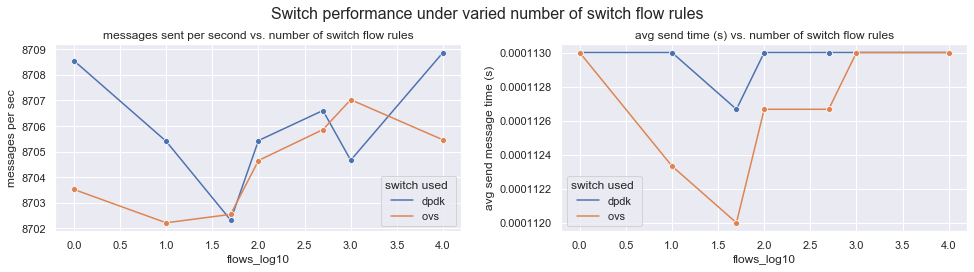

In [6]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
messages_sec = sns.lineplot(
    data=avg_df, 
    y='messages per sec',
    x="flows_log10",
    hue='switch used ',
    marker='o', 
    ax=ax[0],
    ci=None).set_title('messages sent per second vs. number of switch flow rules')

avg_send_time = sns.lineplot(
    data=avg_df, 
    y='avg send message time (s)',
    x="flows_log10",
    hue='switch used ',
    marker='o',
    ax=ax[1],
    ci=None).set_title('avg send time (s) vs. number of switch flow rules')


fig.suptitle('Switch performance under varied number of switch flow rules', fontsize=16) # or plt.suptitle('Main title')
fig.tight_layout(pad=2.0)
fig.subplots_adjust(top=0.85)
fig.show()
